In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Aim:

1. Explore the input data
2. Do feature engineering --> check if any of the features can be combined or expanded
3. Understand and explain the relation between input data and the target variable
4. Build models like logistic regression, LDA, random forest and/ or XGBoost
5. State the assumptions about the data and what we currently have

In [2]:
# Using consolidated.csv as the input file
consolidated = pd.read_csv("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/features/consolidated.csv")
print(consolidated.shape)
consolidated.head()

(4872, 89)


,<?php,and,or,xor,__TRAIT__,__FILE__,__DIR__,__NAMESPACE__,exception,__LINE__,...,_POST,_GET,base64_decode,insteadof,goto,alpha,numbers,splchars,totalChars,benign_mal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,103.0,0.0,28.0,131.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,93.0,0.0,15.0,108.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59.0,0.0,14.0,73.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,77.0,0.0,22.0,99.0,0.0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,98.0,0.0,23.0,121.0,0.0


### Data Analysis - understanding available data

In [3]:
consolidated['benign_mal'].value_counts()

0.0    4180
1.0     692
Name: benign_mal, dtype: int64

In [4]:
consolidated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 89 columns):
<?php                4872 non-null float64
and                  4872 non-null float64
or                   4872 non-null float64
xor                  4872 non-null float64
__TRAIT__            4872 non-null float64
__FILE__             4872 non-null float64
__DIR__              4872 non-null float64
__NAMESPACE__        4872 non-null float64
exception            4872 non-null float64
__LINE__             4872 non-null float64
array                4872 non-null float64
as                   4872 non-null float64
break                4872 non-null float64
case                 4872 non-null float64
class                4872 non-null float64
const                4872 non-null float64
continue             4872 non-null float64
declare              4872 non-null float64
default              4872 non-null float64
die                  4872 non-null float64
do                   4872 non-nul

In [4]:
consolidated.describe()

,<?php,and,or,xor,__TRAIT__,__FILE__,__DIR__,__NAMESPACE__,exception,__LINE__,...,_POST,_GET,base64_decode,insteadof,goto,alpha,numbers,splchars,totalChars,benign_mal
count,4872.000000,4872.000000,4872.000000,4872.0,4872.0,4872.0,4872.0,4872.0,4872.000000,4872.0,...,4872.000000,4872.0,4872.000000,4872.0,4872.0,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000
mean,0.048030,0.593391,0.072455,0.0,0.0,0.0,0.0,0.0,0.000616,0.0,...,0.004310,0.0,0.007389,0.0,0.0,162.249589,426.801108,34.848933,623.899631,0.142036
std,0.213851,1.528589,0.362880,0.0,0.0,0.0,0.0,0.0,0.024809,0.0,...,0.065518,0.0,0.085651,0.0,0.0,621.294920,4803.026929,57.600499,5389.441084,0.349123
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,19.000000,0.000000,7.000000,28.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,49.000000,0.000000,19.000000,67.000000,0.000000
75%,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,128.000000,0.000000,38.000000,176.250000,0.000000
max,1.000000,40.000000,7.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,1.000000,0.0,1.000000,0.0,0.0,10391.000000,77712.000000,901.000000,85115.000000,1.000000


In [6]:
consolidated.dtypes

<?php                float64
and                  float64
or                   float64
xor                  float64
__TRAIT__            float64
__FILE__             float64
__DIR__              float64
__NAMESPACE__        float64
exception            float64
__LINE__             float64
array                float64
as                   float64
break                float64
case                 float64
class                float64
const                float64
continue             float64
declare              float64
default              float64
die                  float64
do                   float64
echo                 float64
else                 float64
elseif               float64
empty                float64
enddeclare           float64
endfor               float64
endforeach           float64
endif                float64
endswitch            float64
                      ...   
interface            float64
implements           float64
public               float64
private       

### Data Analysis - checking if any features can be removed

In [7]:
for column in consolidated.columns:
    print(column, len(consolidated[column].unique()))    

<?php 2
and 20
or 8
xor 1
__TRAIT__ 1
__FILE__ 1
__DIR__ 1
__NAMESPACE__ 1
exception 2
__LINE__ 1
array 4
as 7
break 3
case 3
class 3
const 1
continue 3
declare 1
default 1
die 5
do 4
echo 3
else 3
elseif 1
empty 2
enddeclare 1
endfor 1
endforeach 1
endif 1
endswitch 1
endwhile 1
eval 2
exit 2
extends 1
for 8
foreach 1
function 4
global 2
if 5
include 3
include_once 1
isset 1
list 3
new 6
print 2
require 3
require_once 1
return 3
static 2
switch 2
unset 1
use 3
var 5
while 3
__FUNCTION__ 1
__CLASS__ 1
__METHOD__ 1
final 2
php_user_filter 1
interface 2
implements 1
public 2
private 2
protected 2
abstract 1
clone 1
try 3
catch 2
throw 2
cfunction 1
old_function 1
this 8
file_put_contents 2
file_get_contents 2
assert 2
__construct 2
=> 2
( 18
) 19
_POST 2
_GET 1
base64_decode 2
insteadof 1
goto 1
alpha 586
numbers 94
splchars 232
totalChars 685
benign_mal 2


In [9]:
# Getting rid of columns that do not have any information -> Verify if they do not have any information before getting rid of them
single_val_columns = []
for column in consolidated.columns:
    if len(consolidated[column].unique()) == 1:
        single_val_columns.append(column)
print(len(single_val_columns))

34


In [14]:
# Checking if the single value columns have all its values as 0
for column in single_val_columns:
    if consolidated[column].unique()[0] != 0:
        print(column, consolidated[column].unique())

The presence of 34 columns with no concrete information suggests that there is a need to get more sample data. However, if the model performs well in training as well as test, then we can conclude that the information provided by these columns are not significant enough to affect the model. Needs testing with real data to confirm the hypothesis.

In [16]:
consolidated_valid_cols = consolidated.drop(single_val_columns, axis=1)
print(consolidated_valid_cols.shape)
consolidated_valid_cols.head()

(4872, 55)


,<?php,and,or,exception,array,as,break,case,class,continue,...,=>,(,),_POST,base64_decode,alpha,numbers,splchars,totalChars,benign_mal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,103.0,0.0,28.0,131.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,93.0,0.0,15.0,108.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59.0,0.0,14.0,73.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,77.0,0.0,22.0,99.0,0.0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,98.0,0.0,23.0,121.0,0.0


In [17]:
# Take a look at the distribution of values for columns with two unique values
# These columns could be categorical. Potentially, if we come across any value other than 0 or 1 in these columns, it could be an error scenario

In [18]:
two_val_columns = []
for column in consolidated_valid_cols.columns:
    if len(consolidated_valid_cols[column].unique()) == 2:
        two_val_columns.append(column)
        print(column, consolidated_valid_cols[column].unique())
print(len(two_val_columns))

<?php [0. 1.]
exception [0. 1.]
empty [0. 1.]
eval [0. 1.]
exit [0. 1.]
global [0. 1.]
print [0. 1.]
static [0. 1.]
switch [0. 1.]
final [0. 1.]
interface [0. 1.]
public [0. 1.]
private [0. 1.]
protected [0. 1.]
catch [0. 1.]
throw [0. 1.]
file_put_contents [0. 1.]
file_get_contents [0. 1.]
assert [0. 1.]
__construct [0. 1.]
=> [0. 1.]
_POST [0. 1.]
base64_decode [0. 1.]
benign_mal [0. 1.]
24


<b> Question: </b> Can we consider <?php and exit as categorical variables? Will a post request have more than one count of these keywords anytime?

All other variables from the two_val_columns list cannot be categorical. benign_mal is categorical. It is the target variable.

In [20]:
for column in two_val_columns:
    print(column)
    print(consolidated_valid_cols[column].value_counts())

<?php
0.0    4638
1.0     234
Name: <?php, dtype: int64
exception
0.0    4869
1.0       3
Name: exception, dtype: int64
empty
0.0    4867
1.0       5
Name: empty, dtype: int64
eval
0.0    4840
1.0      32
Name: eval, dtype: int64
exit
0.0    4644
1.0     228
Name: exit, dtype: int64
global
0.0    4870
1.0       2
Name: global, dtype: int64
print
0.0    4869
1.0       3
Name: print, dtype: int64
static
0.0    4871
1.0       1
Name: static, dtype: int64
switch
0.0    4871
1.0       1
Name: switch, dtype: int64
final
0.0    4865
1.0       7
Name: final, dtype: int64
interface
0.0    4871
1.0       1
Name: interface, dtype: int64
public
0.0    4863
1.0       9
Name: public, dtype: int64
private
0.0    4869
1.0       3
Name: private, dtype: int64
protected
0.0    4871
1.0       1
Name: protected, dtype: int64
catch
0.0    4865
1.0       7
Name: catch, dtype: int64
throw
0.0    4865
1.0       7
Name: throw, dtype: int64
file_put_contents
0.0    4831
1.0      41
Name: file_put_contents, dtype

In [21]:
# The columns with only 1 or 2 rows with count = 1 and all other rows with count = 0 would most likely not contribute much to the model.
# Verifying this claim using the list of columns that were already selected (using correlation) since that model gave good results

In [22]:
for column in consolidated_valid_cols:
    if (column not in ['global', 'static', 'switch', 'interface', 'protected']):
        print(column)
        
# Not all columns match        

<?php
and
or
exception
array
as
break
case
class
continue
die
do
echo
else
empty
eval
exit
for
function
if
include
list
new
print
require
return
use
var
while
final
public
private
try
catch
throw
this
file_put_contents
file_get_contents
assert
__construct
=>
(
)
_POST
base64_decode
alpha
numbers
splchars
totalChars
benign_mal


In [ ]:
# Getting rid of columns with barely any information
consolidated_data = consolidated_valid_cols.drop(['global', 'static', 'switch', 'interface', 'protected'], axis=1)
print(consolidated_data.shape)

In [45]:
consolidated_data.columns

Index(['<?php', 'and', 'or', 'exception', 'array', 'as', 'break', 'case',
       'class', 'continue', 'die', 'do', 'echo', 'else', 'empty', 'eval',
       'exit', 'for', 'function', 'if', 'include', 'list', 'new', 'print',
       'require', 'return', 'use', 'var', 'while', 'final', 'public',
       'private', 'try', 'catch', 'throw', 'this', 'file_put_contents',
       'file_get_contents', 'assert', '__construct', '=>', '(', ')', '_POST',
       'base64_decode', 'alpha', 'numbers', 'splchars', 'totalChars',
       'benign_mal'],
      dtype='object')

In [48]:
# Get the columns with greater than 10 unique values and make plots with the target variable
continuous_columns = []
for column in consolidated_data.columns:
    if len(consolidated_data[column].unique()) > 10:
        continuous_columns.append(column)
print(len(continuous_columns))

7


In [49]:
continuous_columns

['and', '(', ')', 'alpha', 'numbers', 'splchars', 'totalChars']

In [ ]:
consolidated_data['benign_mal'] = consolidated_data['benign_mal'].astype('category')
consolidated_data.dtypes

### Some plots to show the relation of the input features with the target

In [3]:
consolidated['benign_mal'] = consolidated['benign_mal'].astype('category')

KeyboardInterrupt: 

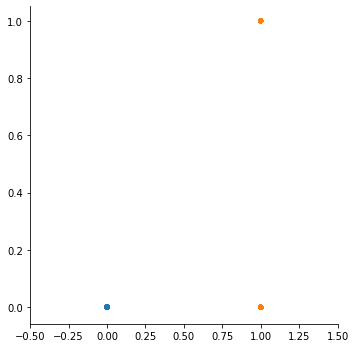

In [9]:
# Plot was taking too long and did not generate the plot. Was stopped half way
catplotswarm1 = sns.catplot(x="benign_mal", y="eval", kind="swarm", data=consolidated)
# catplot1.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/feature1_(.png")

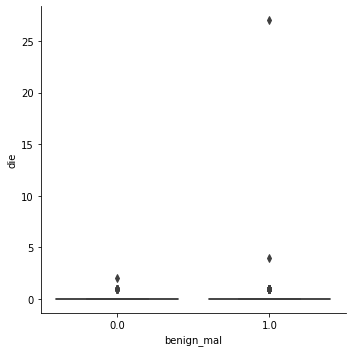

In [8]:
sns.catplot(x="benign_mal", y="die", kind="box", data=consolidated)

In [ ]:
sns.catplot(x="benign_mal", y="eval", kind="box", data=consolidated)

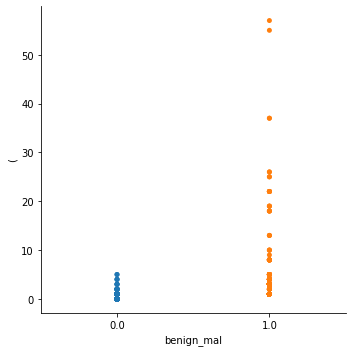

In [11]:
catplot1 = sns.catplot(x="benign_mal", y="(", jitter=False, data=consolidated)
catplot1.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/feature1_(.png")

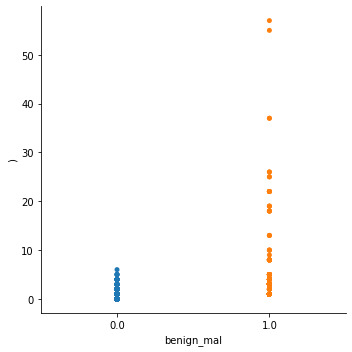

In [13]:
catplot2 = sns.catplot(x="benign_mal", y=")", jitter=False, data=consolidated)
catplot2.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/feature2_).png")

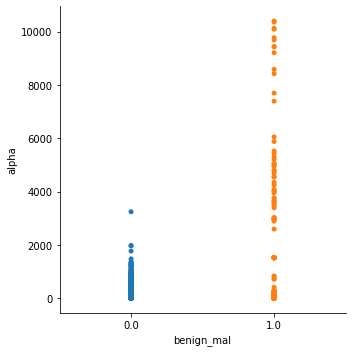

In [14]:
catplot2 = sns.catplot(x="benign_mal", y="alpha", jitter=False, data=consolidated)
catplot2.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/feature3_alpha.png")

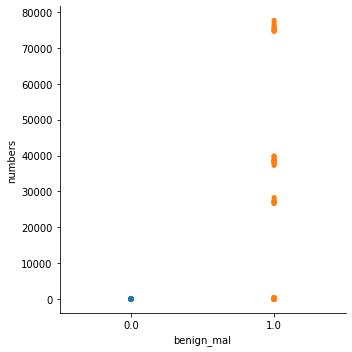

In [15]:
catplot2 = sns.catplot(x="benign_mal", y="numbers", jitter=False, data=consolidated)
catplot2.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/feature4_numbers.png")

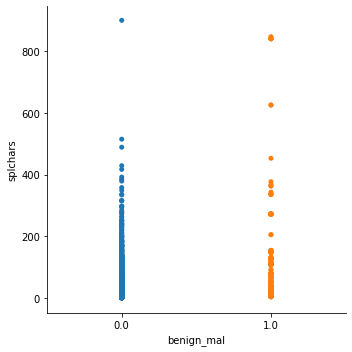

In [16]:
catplot2 = sns.catplot(x="benign_mal", y="splchars", jitter=False, data=consolidated)
catplot2.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/feature5_splchars.png")

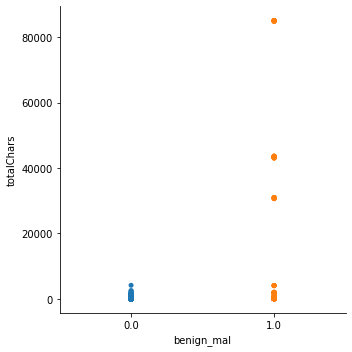

In [17]:
catplot2 = sns.catplot(x="benign_mal", y="totalChars", jitter=False, data=consolidated)
catplot2.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/feature6_totalChars.png")

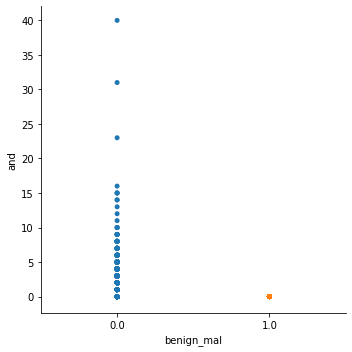

In [18]:
catplot2 = sns.catplot(x="benign_mal", y="and", jitter=False, data=consolidated)
catplot2.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/feature7_and.png")

********* and *********
********* ( *********
********* ) *********
********* alpha *********
********* numbers *********
********* splchars *********
********* totalChars *********


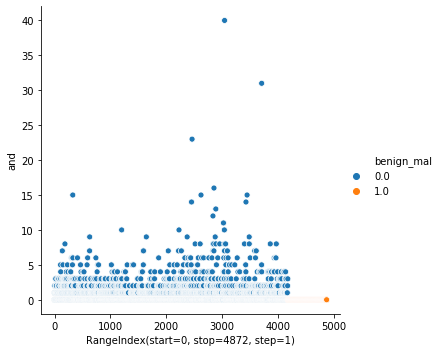

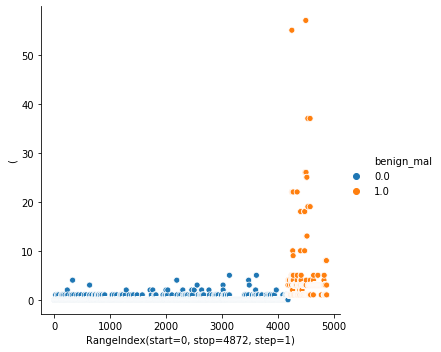

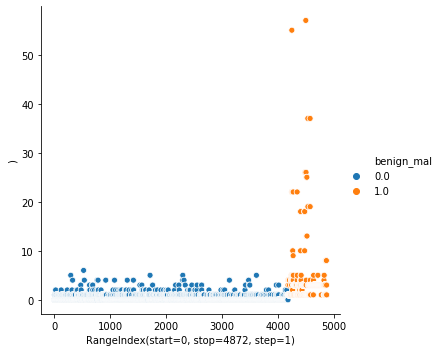

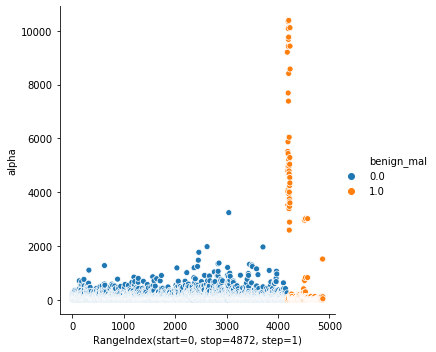

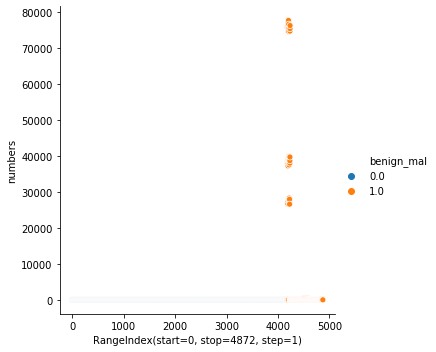

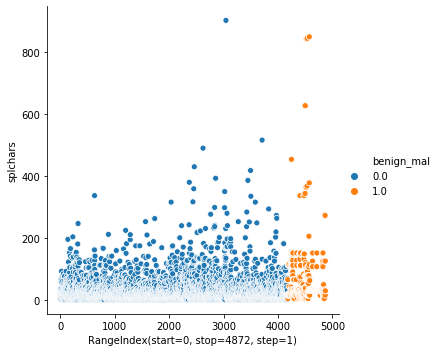

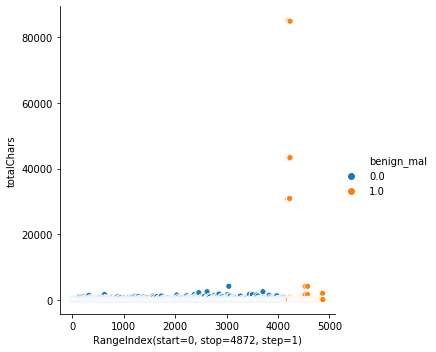

In [58]:
%matplotlib inline

for col in continuous_columns:
    print("*********", col, "*********")
    temp_df = consolidated_data[[col, 'benign_mal']]
#     temp_df.sort_values(by=[col], inplace=True)
    sns.relplot(data=temp_df[[col, 'benign_mal']], x=temp_df.index, y=col, hue="benign_mal", kind="scatter")
    

KeyboardInterrupt: 

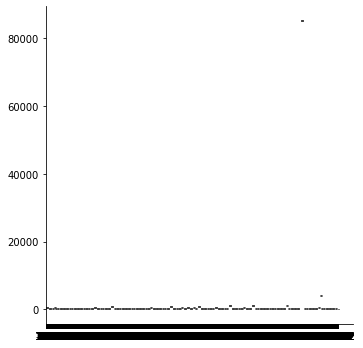

In [59]:
# Again, plot was taking too long. Had to interrupt manually to stop it
sns.catplot(data=consolidated_data[['totalChars', 'benign_mal']], x=consolidated_data.index, y="totalChars", hue="benign_mal", kind="box")

In [ ]:
sns.heatmap(consolidated_data.corr(), xticklabels=consolidated_data.columns, yticklabels=consolidated_data.columns)

### Feature Selection

In [ ]:
# Verifying if the features selected are giving consistent results as the ones from before Srini anna created

In [28]:
x = consolidated_data.iloc[:, 0:consolidated_data.shape[1]-1]
print(x.shape)

(4872, 49)


In [29]:
y = consolidated_data.iloc[:, consolidated_data.shape[1]-1]
print(y.shape)

(4872,)


In [7]:
x = consolidated.iloc[:, 0:consolidated.shape[1]-1]
y = consolidated.iloc[:, consolidated.shape[1]-1]

### Model building

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3897, 88)
(975, 88)
(3897,)
(975,)


In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [35]:
model = LogisticRegression(solver='liblinear', C=0.05, random_state=0)

In [36]:
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = model.predict(x_test)

In [17]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9930715935334873
0.9917948717948718


In [44]:
confusion_matrix(y_test, y_pred)

array([[822,   0],
       [  4, 149]], dtype=int64)

In [22]:
model.coef_

array([[ 5.06353957e-01, -2.44631419e-01, -5.48834489e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.55106095e-02,
         0.00000000e+00,  2.42120202e-01, -1.14168364e-01,
        -8.15878958e-03, -2.08352442e-02, -1.07299149e-02,
         0.00000000e+00, -7.96386565e-03,  0.00000000e+00,
         0.00000000e+00,  1.51609941e-01, -6.49092643e-02,
         6.15291924e-02,  7.99019074e-03,  0.00000000e+00,
        -6.68563718e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.67115289e-01,  5.00330049e-01,
         0.00000000e+00, -1.63869741e-01,  0.00000000e+00,
         9.28168233e-02, -7.21443345e-03, -4.07411391e-02,
         7.69162042e-03,  0.00000000e+00,  0.00000000e+00,
        -2.47431559e-02, -3.30144573e-02, -9.43915433e-03,
        -6.52007166e-03,  0.00000000e+00, -1.35597698e-02,
        -4.33927478e-03,  8.80977931e-03,  0.00000000e+0

In [23]:
model.intercept_

array([-2.21797822])

In [ ]:
# Plot Area under RoC curve
# Find out the best sensitivity to be set for this data

In [37]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.6f' % np.mean(scores))

Mean ROC AUC: 0.999348


In [28]:
scores

array([0.99794942, 0.99993165, 0.99972263, 1.        , 0.99712225,
       1.        , 0.99972263, 0.99954927, 0.99996533, 0.99899452,
       0.9992823 , 0.99993165, 0.99726094, 0.99996533, 0.99941058,
       0.99802372, 0.99996533, 1.        , 1.        , 0.9997573 ,
       1.        , 0.99938483, 0.99954927, 0.99802372, 0.99989599,
       0.9995146 , 0.99750364, 0.99996533, 1.        , 1.        ,
       1.        , 0.99931647, 0.9997573 , 1.        , 0.9981624 ,
       0.9997573 , 0.99947993, 0.99954927, 0.99805839, 1.        ,
       0.99955571, 0.99924812, 0.99968796, 0.99996533, 0.99757298,
       0.99712225, 0.99979197, 1.        , 1.        , 0.99996533])

In [40]:
model_wt = LogisticRegression(solver='liblinear', C=0.05, random_state=0, class_weight={0:0.15, 1:1})
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_wt, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.6f' % np.mean(scores))

Mean ROC AUC: 0.998061


In [31]:
from sklearn.utils.class_weight import compute_class_weight

weighting = compute_class_weight('balanced', [0,1], y)
print(weighting)

[0.58277512 3.52023121]


In [39]:
model_wt = LogisticRegression(solver='liblinear', C=0.05, random_state=0, class_weight={0:0.58277512, 1:3.52023121})
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_wt, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.6f' % np.mean(scores))

Mean ROC AUC: 0.999149


In [84]:
model_wt = LogisticRegression(solver='liblinear', C=0.05, random_state=0, class_weight={0:0.58277512, 1:3.52023121})
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_wt, x, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1 score: %.6f' % np.mean(scores))

Mean F1 score: 0.976567


In [44]:
model_wt.fit(x_train, y_train)
model_wt.coef_

array([[ 2.85980591e-01, -2.35156523e-01, -6.80055134e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.76383563e-02,
         0.00000000e+00,  1.24711592e-01, -1.24600394e-01,
        -1.20988567e-02, -1.54233881e-02, -1.49385765e-02,
         0.00000000e+00, -1.73575748e-02,  0.00000000e+00,
         0.00000000e+00,  1.26348629e-01, -7.51772253e-02,
         3.14953135e-02, -7.57142453e-03,  0.00000000e+00,
        -6.91940409e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.66559165e-02,  2.81998690e-01,
         0.00000000e+00, -1.81420046e-01,  0.00000000e+00,
         4.70942694e-02, -8.32502368e-03, -5.43831365e-02,
         5.68993182e-04,  0.00000000e+00,  0.00000000e+00,
        -1.91954788e-02, -3.13455139e-02, -1.28140911e-02,
        -7.26131559e-03,  0.00000000e+00, -1.34303560e-02,
        -6.04068618e-03,  4.89261760e-03,  0.00000000e+0

In [47]:
coef = model_wt.coef_
print(len(coef[0]))

88


In [54]:
coef_df = pd.DataFrame()
coef_df['features'] = consolidated.columns[:-1]
coef_df['coefficients'] = coef[0]

In [61]:
coef_df.sort_values(by=['coefficients'], ascending=False).reset_index(drop=True)

,features,coefficients
0,=>,1.481495
1,(,0.877898
2,),0.681946
3,<?php,0.285981
4,exit,0.281999
5,numbers,0.143246
6,totalChars,0.133680
7,die,0.126349
8,array,0.124712
9,assert,0.118290


In [33]:
scores

array([0.99791524, 0.99976077, 0.99958394, 1.        , 0.99701824,
       0.99947993, 0.99920255, 0.99979197, 1.        , 0.99892518,
       0.99931647, 1.        , 0.99587407, 0.99996533, 0.99882116,
       0.99778101, 0.99979197, 0.99986131, 0.99979197, 0.9997573 ,
       1.        , 0.9987013 , 0.99941058, 0.99788503, 0.99989599,
       0.99774634, 0.99753831, 0.99996533, 0.99989599, 0.99989599,
       0.99986329, 0.99897471, 0.9997573 , 0.99982664, 0.99795437,
       0.99920255, 0.99937591, 0.99909854, 0.99805839, 1.        ,
       0.99986329, 0.99873548, 0.99930657, 1.        , 0.99753831,
       0.99729561, 0.99920255, 1.        , 0.99986131, 0.99996533])

In [41]:
model3 = LogisticRegression(solver='liblinear', C=0.05, random_state=0, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model_wt, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.6f' % np.mean(scores))

Mean ROC AUC: 0.998061


In [65]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model_wt, x_train, y_train, cv=2, return_estimator=True)

for temp_model in cv_results['estimator']:
    print(temp_model.coef_)

[[ 2.63484532e-01 -1.66560601e-01 -4.80457803e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.45226576e-02  0.00000000e+00  1.01304046e-01 -9.81009510e-02
  -1.89170658e-02 -2.51252329e-02 -1.22715253e-02  0.00000000e+00
  -2.08896463e-03  0.00000000e+00  0.00000000e+00  1.46741294e-01
  -4.27444306e-02  2.77397198e-02 -7.80665102e-04  0.00000000e+00
  -1.55488393e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.73056135e-02
   2.61459230e-01  0.00000000e+00 -1.29100045e-01  0.00000000e+00
   3.79330478e-02  2.05407757e-02 -4.81696602e-02 -9.79466371e-03
   0.00000000e+00  0.00000000e+00 -4.16608073e-03 -2.13499904e-02
   2.51604398e-02 -1.57414981e-02  0.00000000e+00 -1.47022512e-02
   1.45226576e-02 -3.50446784e-03  0.00000000e+00 -2.00850438e-02
   2.97889097e-02 -2.99428334e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.52477238e-03  0.00000000e+00  1.45226576e-02
   0.00000

In [66]:
model_wt.coef_

array([[ 2.85980591e-01, -2.35156523e-01, -6.80055134e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.76383563e-02,
         0.00000000e+00,  1.24711592e-01, -1.24600394e-01,
        -1.20988567e-02, -1.54233881e-02, -1.49385765e-02,
         0.00000000e+00, -1.73575748e-02,  0.00000000e+00,
         0.00000000e+00,  1.26348629e-01, -7.51772253e-02,
         3.14953135e-02, -7.57142453e-03,  0.00000000e+00,
        -6.91940409e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.66559165e-02,  2.81998690e-01,
         0.00000000e+00, -1.81420046e-01,  0.00000000e+00,
         4.70942694e-02, -8.32502368e-03, -5.43831365e-02,
         5.68993182e-04,  0.00000000e+00,  0.00000000e+00,
        -1.91954788e-02, -3.13455139e-02, -1.28140911e-02,
        -7.26131559e-03,  0.00000000e+00, -1.34303560e-02,
        -6.04068618e-03,  4.89261760e-03,  0.00000000e+0

In [ ]:
mean_coef_df = pd.DataFrame()
mean_coef_df['features'] = consolidated.columns[:-1]
mean_coef_df['coefficients'] = coef[0]

coef_df.sort_values(by=['coefficients'], ascending=False).reset_index(drop=True)

In [68]:
y_pred = model_wt.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[838,   1],
       [  7, 129]], dtype=int64)

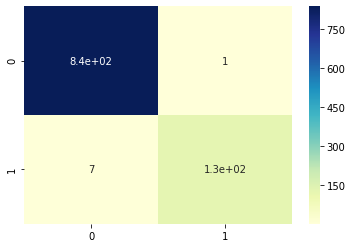

In [71]:
conf_matx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matx, annot=True, cmap="YlGnBu")

### Pretty print confusion matrix

### Reference: https://medium.com/analytics-vidhya/generation-of-a-concatenated-confusion-matrix-in-cross-validation-912485c4a972

In [4]:
def evaluate_model(data_x, data_y):
    k_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        temp_train_x, temp_train_y, temp_test_x, temp_test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        # Fit the classifier
        classifier = LogisticRegression(solver='liblinear', C=0.05, random_state=0, class_weight={0:0.58277512, 1:3.52023121})

        # Predict the labels of the test set samples
        predicted_labels = classifier.predict(temp_test_x)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, temp_test_y)

    return predicted_targets, actual_targets

In [5]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=['benign', 'malicious'], title='Confusion matrix')
    plt.show()

In [18]:
def generate_confusion_matrix(cnf_matrix, classes, title='Confusion matrix'):
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/default_confusion_matrix.png")

    return cnf_matrix

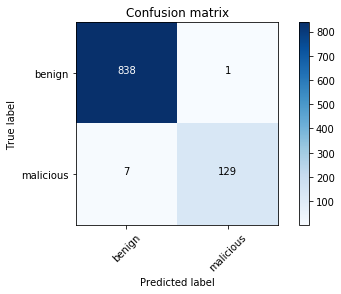

In [83]:
plt.figure()
generate_confusion_matrix(conf_matx, ['benign', 'malicious'], title='Confusion matrix')
plt.show()

In [78]:
conf_matx

array([[838,   1],
       [  7, 129]], dtype=int64)

### Default model without any hyperparameter tuning

In [13]:

model_default = LogisticRegression(solver='liblinear', random_state=0)
model_default.fit(x_train, y_train)

y_pred_default = model_default.predict(x_test)
conf_matx_default = confusion_matrix(y_test, y_pred_default)

In [16]:
# 10-fold cross validation. Get the values of performance metrics with default model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
auc_score_default = cross_val_score(model_default, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean Default ROC AUC: %.6f' % np.mean(auc_score_default))

f1_score_default = cross_val_score(model_default, x, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Default F1 score: %.6f' % np.mean(f1_score_default))

Mean Default ROC AUC: 0.999590
Mean Default F1 score: 0.994115


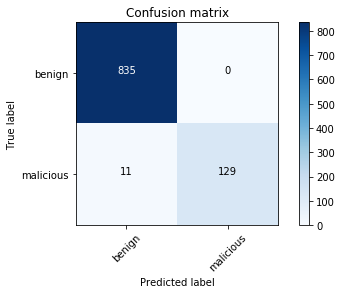

In [19]:
plt.figure()
generate_confusion_matrix(conf_matx_default, ['benign', 'malicious'], title='Confusion matrix')
plt.show()

In [17]:
# Save the figure
plt.savefig("C:/Data/Gayatri/US/Self projects/Security Alert classification/Code/websense/paper-2021/srinik/comments-classify/data/plots/default_confusion_matrix.png")

<Figure size 432x288 with 0 Axes>